# Indian Flight Price Prediction

## Table of content

We will be predicting the flight prices of Indian Airline, using the data provided by [Kaggle_Indian Airlines Ticket Price](https://www.kaggle.com/datasets/shubhambathwal/flight-price-prediction)

### Libraries

In [2]:
# import os and time libraries 
import os 
import time 
import warnings
warnings.filterwarnings('ignore')

# basic libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 

# machine learning libraries using sklearn


In [3]:
# new libraries to import 

## Introduction

## Loading data 

In [4]:
# after downloading the data from kaggle
dataset = pd.read_csv("G://ML_DL_Projects//MLOPS_Indian_Flight_Price_Prediction//Dataset//Clean_Dataset.csv")

# view sample observation in the dataset
dataset.sample(10)

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
90503,90503,Vistara,UK-850,Bangalore,Evening,one,Morning,Delhi,Economy,12.67,33,4111
140787,140787,Air_India,AI-773,Kolkata,Evening,one,Evening,Bangalore,Economy,25.25,38,6512
46586,46586,Vistara,UK-877,Mumbai,Morning,one,Morning,Delhi,Economy,22.25,20,5232
247540,247540,Air_India,AI-503,Bangalore,Evening,zero,Night,Delhi,Business,2.75,36,32923
67308,67308,Air_India,AI-442,Mumbai,Afternoon,one,Morning,Kolkata,Economy,16.50,33,6000
68781,68781,Vistara,UK-928,Mumbai,Early_Morning,one,Evening,Kolkata,Economy,11.58,41,5949
123200,123200,GO_FIRST,G8-789,Kolkata,Morning,one,Night,Delhi,Economy,11.83,24,6488
132997,132997,Air_India,AI-9745,Kolkata,Morning,one,Evening,Mumbai,Economy,5.83,35,4846
265649,265649,Vistara,UK-738,Kolkata,Evening,one,Morning,Mumbai,Business,15.00,25,64831
107491,107491,AirAsia,I5-2461,Bangalore,Evening,one,Late_Night,Kolkata,Economy,10.00,35,3393


We should check whether we have duplicate values in the dataset using the column "Unnamed: 0" using the duplicated method in pandas.

In [5]:
# check for duplicate 
dataset.duplicated(subset = ['Unnamed: 0']).sum()

0

In [6]:
# Drop Column "Unnamed 0"
dataset.drop(labels= ['Unnamed: 0'], axis = 1 , inplace = True)
dataset.sample(5)

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
194502,Vistara,UK-836,Chennai,Morning,one,Evening,Bangalore,Economy,6.25,11,12318
84868,Air_India,AI-9876,Bangalore,Afternoon,one,Morning,Delhi,Economy,17.75,6,9904
260005,Vistara,UK-808,Bangalore,Early_Morning,one,Night,Chennai,Business,14.75,25,60396
227588,Vistara,UK-653,Mumbai,Early_Morning,one,Evening,Delhi,Business,13.83,27,40933
222467,Vistara,UK-995,Delhi,Morning,one,Evening,Chennai,Business,9.58,11,57992


In [7]:
# check the shape of the dataset
print(f"Dataset shape is \n{dataset.shape}\n")

# List the columns present in the dataset
print(f"Columns present in the dataset are \n{dataset.columns}")

Dataset shape is 
(300153, 11)

Columns present in the dataset are 
Index(['airline', 'flight', 'source_city', 'departure_time', 'stops',
       'arrival_time', 'destination_city', 'class', 'duration', 'days_left',
       'price'],
      dtype='object')


In total, we have 300K observations in our dataset with 11 columns, decribing the names of airlines, flight identification number, origin city of the flight and destination city, with its departure and arrival time, and duration. Our target column will be "price" that we will be predicting in the project. 

In [8]:
# check meta data about the dataset
dataset.info(memory_usage = 'deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   airline           300153 non-null  object 
 1   flight            300153 non-null  object 
 2   source_city       300153 non-null  object 
 3   departure_time    300153 non-null  object 
 4   stops             300153 non-null  object 
 5   arrival_time      300153 non-null  object 
 6   destination_city  300153 non-null  object 
 7   class             300153 non-null  object 
 8   duration          300153 non-null  float64
 9   days_left         300153 non-null  int64  
 10  price             300153 non-null  int64  
dtypes: float64(1), int64(2), object(8)
memory usage: 152.8 MB


In detail, overview of the dataset we don't have any null values which we will once again comfirm using isnull() function, and our dataset is occupying 152.8MB of memory.

We have 8 columns that are categorical in nature that we will have to encode and 2 numerical columns.

In [9]:
# check for null values 
dataset.isnull().sum()

airline             0
flight              0
source_city         0
departure_time      0
stops               0
arrival_time        0
destination_city    0
class               0
duration            0
days_left           0
price               0
dtype: int64

In [10]:
# list of all the columns in the dataset
print("Columns in Dataset are:")
print(dataset.columns)

# categorical columns
cat_col = dataset.select_dtypes(include = "object").columns
print("\n")
print('Categorical columns are: ')
print(cat_col)

# numerical columns
num_col = dataset.select_dtypes(exclude = 'object').columns
print("\n")
print("Numerical columns are: ")
print(num_col)

Columns in Dataset are:
Index(['airline', 'flight', 'source_city', 'departure_time', 'stops',
       'arrival_time', 'destination_city', 'class', 'duration', 'days_left',
       'price'],
      dtype='object')


Categorical columns are: 
Index(['airline', 'flight', 'source_city', 'departure_time', 'stops',
       'arrival_time', 'destination_city', 'class'],
      dtype='object')


Numerical columns are: 
Index(['duration', 'days_left', 'price'], dtype='object')


Above is the list of categorical columns and numerical columns in details. 

In [11]:
# check for unique values in categorical columns
for i in cat_col:
    print(i.upper(), " : ", dataset[i].nunique())
    print(dataset[i].unique(),"\n")

AIRLINE  :  6
['SpiceJet' 'AirAsia' 'Vistara' 'GO_FIRST' 'Indigo' 'Air_India'] 

FLIGHT  :  1561
['SG-8709' 'SG-8157' 'I5-764' ... '6E-7127' '6E-7259' 'AI-433'] 

SOURCE_CITY  :  6
['Delhi' 'Mumbai' 'Bangalore' 'Kolkata' 'Hyderabad' 'Chennai'] 

DEPARTURE_TIME  :  6
['Evening' 'Early_Morning' 'Morning' 'Afternoon' 'Night' 'Late_Night'] 

STOPS  :  3
['zero' 'one' 'two_or_more'] 

ARRIVAL_TIME  :  6
['Night' 'Morning' 'Early_Morning' 'Afternoon' 'Evening' 'Late_Night'] 

DESTINATION_CITY  :  6
['Mumbai' 'Bangalore' 'Kolkata' 'Hyderabad' 'Chennai' 'Delhi'] 

CLASS  :  2
['Economy' 'Business'] 



In [12]:
# descriptive statistic of numerical features in dataset
dataset.describe()

,duration,days_left,price
count,300153.000000,300153.000000,300153.000000
mean,12.221021,26.004751,20889.660523
std,7.191997,13.561004,22697.767366
min,0.830000,1.000000,1105.000000
25%,6.830000,15.000000,4783.000000
50%,11.250000,26.000000,7425.000000
75%,16.170000,38.000000,42521.000000
max,49.830000,49.000000,123071.000000


## Exploratory Data Analysis

In this, project or main focus is to predict the price of airline tickets in Indian Aviation Market mostly on tickets of Economy Class and Business class. So while performing EDA, we will keep our focus on these two parameters while answering questions related to them and for other analysis questions.

### Column :- "Airline"

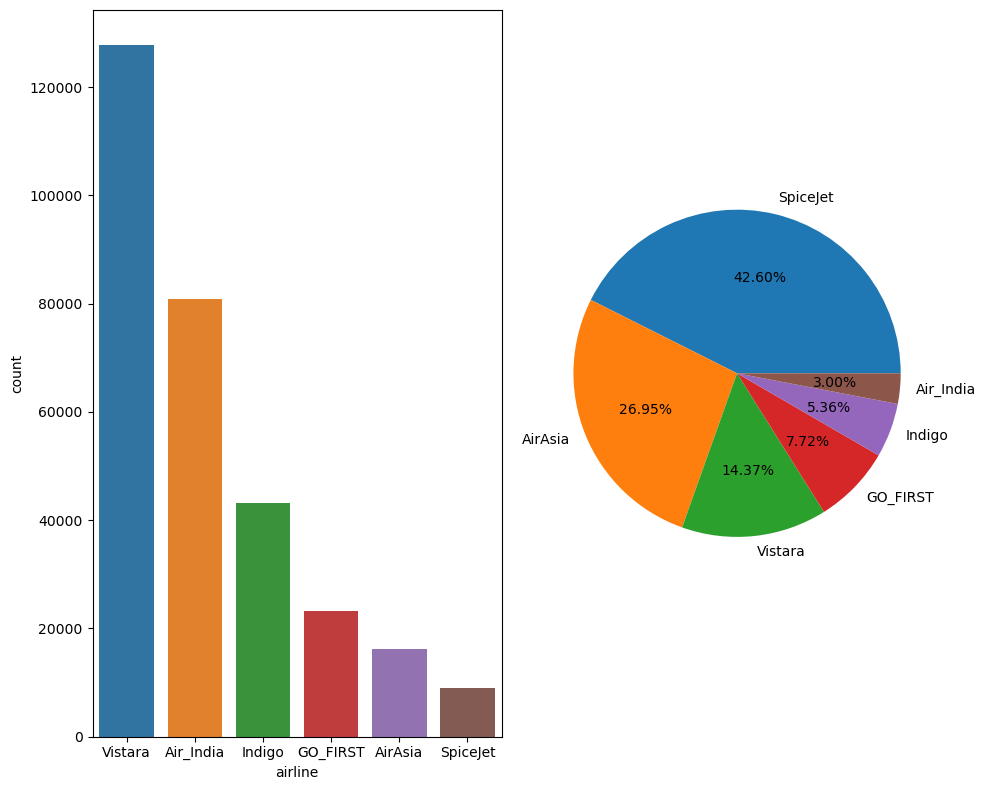

In [14]:
# Count plot

fig, axs = plt.subplots(1,2, figsize = (10,8))

#Count plot
sns.countplot(x = dataset['airline'],ax = axs[0], order = dataset['airline'].value_counts().index)


# Pie plot
axs[1].pie(dataset['airline'].value_counts(), labels = dataset['airline'].unique(), autopct = "%0.2f%%")

# Adjust layout 
plt.tight_layout()
# show plot
plt.show()

In [49]:
dataset.columns

Index(['airline', 'flight', 'source_city', 'departure_time', 'stops',
       'arrival_time', 'destination_city', 'class', 'duration', 'days_left',
       'price'],
      dtype='object')

## Feature Engineering and Feature Selection

####  Pearson Correlation matrix

## Model Building

For model building we will be using all the availabel algorithms in ML for current regression problem.